In [1]:
from statistics import mean 
import numpy as np 

In [97]:
import matplotlib.pyplot as plt
import random 
def craete_dataset(hm, variance, step=2, correlation= False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

xs, ys = craete_dataset(100,40, 2, correlation='pos')

In [99]:
def bset_fit_slope_intersept(xs, ys):
    m = (((mean(xs) * mean(ys)) - mean(xs*ys))/
           ((mean(xs)**2)- mean(xs**2)))
    b = mean(ys) - m*mean(xs)
    return m,b 
m, b = bset_fit_slope_intersept(xs, ys)
print(m, b)

1.9992019201920204 -3.89049504950502


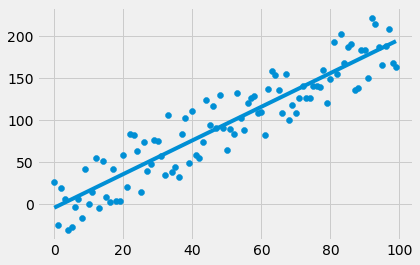

In [100]:
regression_line = [(m*x) + b  for x in xs]
from matplotlib import style 
style.use('fivethirtyeight')
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

In [101]:
def squared_error(ys_org, ys_line):
    return sum((ys_line - ys_org)**2)

def coefficient_of_determination(ys_org, ys_line):
    ys_mean_line = [mean(ys_org) for y in ys_org]
    squared_error_regr = squared_error(ys_org, ys_line)
    squared_error_y_mean =  squared_error(ys_org, ys_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)


r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.8558415352019231
